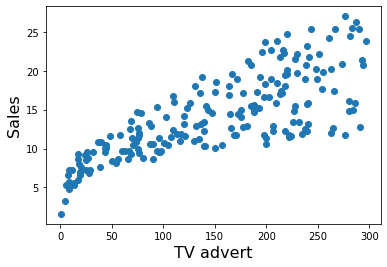

In [1]:
import numpy as np
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt


import pandas as pd
#Importing the dataset
data = pd.read_csv("dataset/Advertising.csv")
data.head()
x=data['TV'].values
y=data['Sales'].values
plt.scatter(x,y)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("TVSales.pdf")


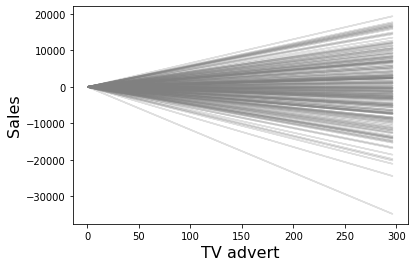

In [42]:
alpha = pm.Normal.dist(0.0,30).random(size=200)
beta = pm.Normal.dist(0.0,30).random(size=200)
for i in range(200):
    plt.plot(x,alpha[i]+beta[i]*x,color='gray',alpha=0.25)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("prior_rl.pdf")

In [56]:
regmodel=pm.Model()
with regmodel:
    alpha = pm.Normal('alpha',0.0,30)
    beta  = pm.Normal('beta',0.0,30)
    sigma = pm.Uniform('sigma',0.0001,20)
    mu = pm.Deterministic('mu',beta*x[0:3]+alpha)
    yo=pm.Normal('Like',mu,sigma,observed=y[0:3])

with regmodel:
    samples=pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 4,344 divergences: 100%|██████████| 22000/22000 [00:11<00:00, 1999.38draws/s]
There were 2278 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.34742769230389553, but should be close to 0.8. Try to increase the number of tuning steps.
There were 474 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6206537718468822, but should be close to 0.8. Try to increase the number of tuning steps.
There were 776 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5360192230377301, but should be close to 0.8. Try to increase the number of tuning steps.
There were 814 divergences after tuning. Inc

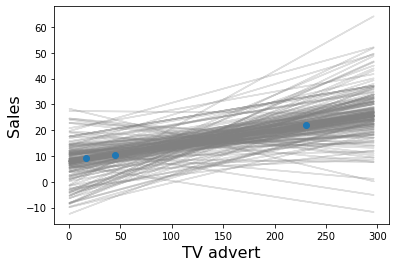

In [57]:
for i in range(200):
    plt.plot(x,samples['alpha'][i]+samples['beta'][i]*x,color='gray',alpha=0.25)
plt.scatter(x[0:3],y[0:3],zorder=1000)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("post3_rl.pdf")

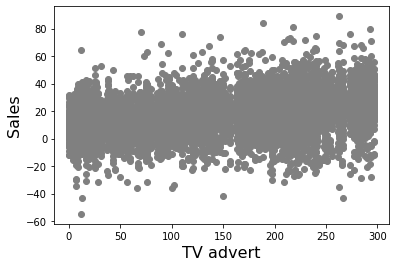

In [62]:
for i in range(100):
    plt.scatter(x,pm.Normal.dist(samples['alpha'][i]+samples['beta'][i]*x,samples['sigma'][i]).random(size=1),color='gray')
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("post3_yo.pdf")

In [73]:
regmodel=pm.Model()
with regmodel:
    alpha = pm.Normal('alpha',0.0,30)
    beta  = pm.Normal('beta',0.0,30)
    sigma = pm.Uniform('sigma',0.0001,20)
    mu = pm.Deterministic('mu',beta*x+alpha)
    yo=pm.Normal('Like',mu,sigma,observed=y*300)
with regmodel:
    samples=pm.sample(5000,tune=1000, chains=1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta, alpha]
Sampling chain 0, 0 divergences: 100%|██████████| 6000/6000 [00:16<00:00, 353.38it/s] 
The acceptance probability does not match the target. It is 0.9382860132131138, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [79]:
y[np.argmin(x)]*200

320.0

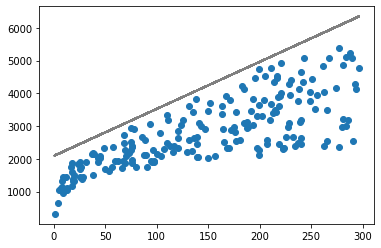

In [74]:
for i in range(2000):
    plt.plot(x,samples['alpha'][i]+samples['beta'][i]*x,color='gray',alpha=0.25)
plt.scatter(x,y*200,zorder=1000)
plt.savefig("post_yscaled.pdf")

In [26]:
regmodel=pm.Model()
with regmodel:
    alpha = pm.Normal('alpha',0.0,30)
    beta  = pm.Normal('beta',0.0,30)
    sigma = pm.Uniform('sigma',0.0001,20)
    mu = pm.Deterministic('mu',beta*x+alpha)
    yo=pm.Normal('Like',mu,sigma,observed=y)

with regmodel:
    samples=pm.sample_prior_predictive(5000)

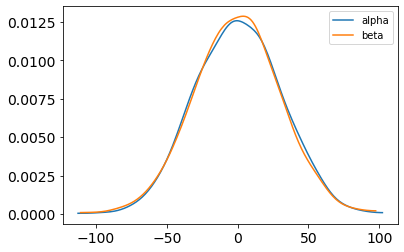

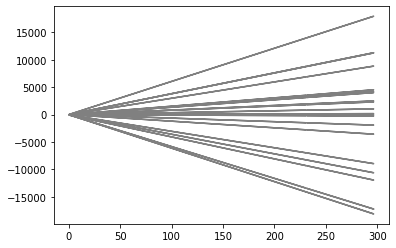

In [33]:
import arviz as az
az.plot_dist(samples['alpha'],label='alpha')
az.plot_dist(samples['beta'],label='beta')
#az.plot_dist(samples['sigma'])
plt.savefig("prior_alpha_beta.pdf")
plt.figure()
plt.plot(x,samples['mu'][0:20,:].T,color='gray');
#az.plot_posterior(samples, var_names='sigma', credible_interval=0.95)
#plt.savefig("prior_sigma.pdf")

In [25]:
import numpy as np
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt
D=np.array([0.15,0.21,0.22,0.18,0.27,0.29,0.26,0.12,0.25,0.24])

print(np.mean(D),np.mean((D-np.mean(D))**2))
print(np.mean(D),np.sqrt(np.mean((D-np.mean(D))**2)))

0.21900000000000003 0.0026889999999999996
0.21900000000000003 0.05185556864985669


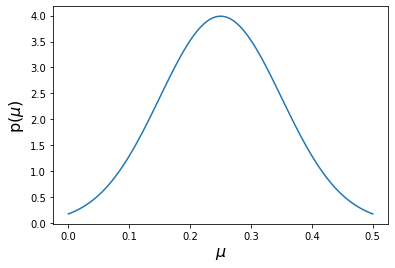

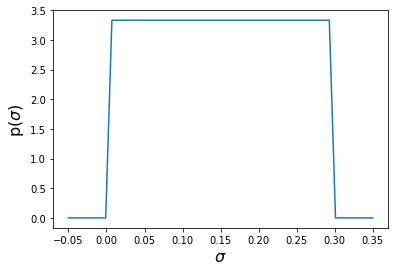

In [26]:
x=np.linspace(0.0,0.5,100)
plt.plot(x,np.exp(pm.Normal.dist(0.25,0.1).logp(x).eval()))
plt.ylabel("p($\mu$)",fontsize=16)
plt.xlabel("$\mu$",fontsize=16);
plt.savefig("prior_mu.pdf")
plt.figure()
x=np.linspace(-0.05,0.35)
plt.plot(x,np.exp(pm.Uniform.dist(0.0001,0.3).logp(x).eval()))
plt.ylabel("p($\sigma$)",fontsize=16)
plt.xlabel("$\sigma$",fontsize=16);
plt.savefig("prior_sigma.pdf")

In [28]:
D=np.array([0.24,0.24,0.24])
mymodel=pm.Model()
with mymodel:
    mu = pm.Normal('mu',0.25,0.1)
    sigma = pm.Uniform('sigma',0.0001,0.2)
    pm.Normal('Like',mu,sigma,observed=D)

with mymodel:
    estimate=pm.find_MAP()
print(estimate['mu'],estimate['sigma'])

logp = 27.863, ||grad|| = 0.19808: 100%|██████████| 62/62 [00:00<00:00, 2992.14it/s]          

0.24000000399360533 0.00010000000410749458


In [29]:
D=np.array([0.212 , 0.188 , 0.367 , 0.1886, 0.1595, 0.1766, 0.1787, 0.1786,
       0.231 , 0.2335, 0.2599, 0.2136, 0.2114, 0.1825, 0.3127, 0.1861,
       0.2161, 0.2534, 0.2699, 0.1528]) 
print(np.mean(D),np.mean((D-np.mean(D))**2))
print(np.mean(D),np.sqrt(np.mean((D-np.mean(D))**2)))

0.218595 0.0026951244749999995
0.218595 0.051914588267653626


In [30]:
mymodel=pm.Model()
with mymodel:
    mu = pm.Normal('mu',0.25,0.1)
    sigma = pm.Uniform('sigma',0.0001,0.2)
    pm.Normal('Like',mu,sigma,observed=D)

with mymodel:
    estimate=pm.find_MAP()
print(estimate['mu'],estimate['sigma'])

logp = 33.713, ||grad|| = 15.64: 100%|██████████| 16/16 [00:00<00:00, 4137.41it/s]  

0.21901258483163405 0.05191627823315031


In [59]:
D=np.array([0.15,0.21,0.22,0.18,0.27,0.29,0.26,0.12,0.25,0.24])
mymodel=pm.Model()
with mymodel:
    mu = pm.Normal('mu',0.25,0.1)
    sigma = pm.Uniform('sigma',0.0001,0.2)
    pm.Normal('Like',mu,sigma,observed=D)

with mymodel:
    samples=pm.sample(30000,tune=3000,chains=1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling chain 0, 0 divergences: 100%|██████████| 33000/33000 [00:14<00:00, 2235.94it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


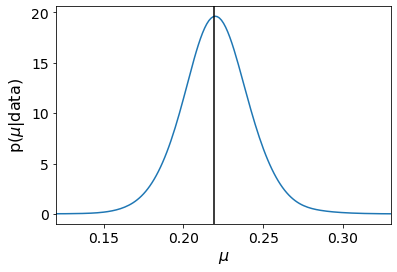

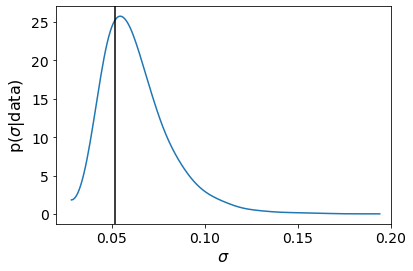

In [60]:
az.plot_dist(samples['mu'])
plt.ylabel("p($\mu$|data)",fontsize=16)
plt.xlabel("$\mu$",fontsize=16);
plt.axvline(0.219,color='black')
plt.xlim([0.12,0.33])
plt.savefig("posterior_mu.pdf")
plt.figure()
az.plot_dist(samples['sigma'])
plt.ylabel("p($\sigma$|data)",fontsize=16)
plt.xlabel("$\sigma$",fontsize=16);
plt.axvline(0.051916,color='black')
plt.xlim([0.02,0.2])
plt.savefig("posterior_sigma.pdf")

In [61]:
D=np.array([0.212 , 0.188 , 0.367 , 0.1886, 0.1595, 0.1766, 0.1787, 0.1786,
       0.231 , 0.2335, 0.2599, 0.2136, 0.2114, 0.1825, 0.3127, 0.1861,
       0.2161, 0.2534, 0.2699, 0.1528]) 
mymodel=pm.Model()
with mymodel:
    mu = pm.Normal('mu',0.25,0.1)
    sigma = pm.Uniform('sigma',0.0001,0.2)
    pm.Normal('Like',mu,sigma,observed=D)

with mymodel:
    samples=pm.sample(10000,tune=3000,chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling chain 0, 0 divergences: 100%|██████████| 13000/13000 [00:05<00:00, 2184.24it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


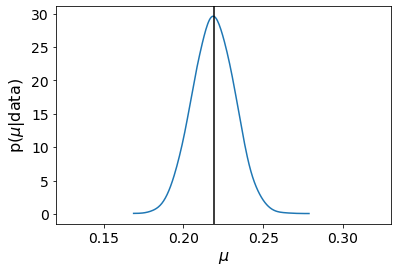

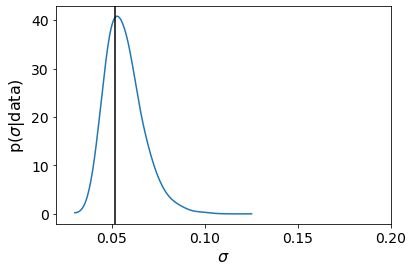

In [63]:
az.plot_dist(samples['mu'])
plt.ylabel("p($\mu$|data)",fontsize=16)
plt.xlabel("$\mu$",fontsize=16);
plt.axvline(0.219,color='black')
plt.xlim([0.12,0.33])
plt.savefig("posterior_mu2.pdf")
plt.figure()
az.plot_dist(samples['sigma'])
plt.xlim([0.02,0.2])
plt.ylabel("p($\sigma$|data)",fontsize=16)
plt.xlabel("$\sigma$",fontsize=16);
plt.axvline(0.051916,color='black')
plt.savefig("posterior_sigma2.pdf")

In [23]:

import theano.tensor as tt
import arviz as az

#for i in range(100):
#    D=np.random.randn(20)*0.05+0.221
def objective(D):
    #print(D)
    D=np.round(D,4)
    mymodel=pm.Model()
    with mymodel:
        mu = pm.Normal('mu',0.25,0.1)
        sigma = pm.Uniform('sigma',0.0001,0.2)
        pm.Normal('Like',mu,sigma,observed=D)

    with mymodel:
        estimate=pm.find_MAP()
    print(estimate['mu'],estimate['sigma'])
    err=np.abs(estimate['x']-0.2190)**2+np.abs(estimate['s']-0.05186)**2
    print(repr(D),err)
    return np.log(err)
        
objective(D)

logp = 33.713, ||grad|| = 15.64: 100%|██████████| 16/16 [00:00<00:00, 3942.48it/s]  

0.21901258483163405 0.05191627823315031
array([0.212 , 0.188 , 0.367 , 0.1886, 0.1595, 0.1766, 0.1787, 0.1786,
       0.231 , 0.2335, 0.2599, 0.2136, 0.2114, 0.1825, 0.3127, 0.1861,
       0.2161, 0.2534, 0.2699, 0.1528]) 3.3256175137774015e-09


-19.521610461652834

In [47]:
from scipy.optimize import minimize
D0=np.random.randn(20)*0.05+0.221
D0=np.array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493])
res = minimize(objective, D0, method='Nelder-Mead', tol=1e-8)

logp = 34.308, ||grad|| = 0.11026: 100%|██████████| 14/14 [00:00<00:00, 3590.35it/s]  
INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


0.21913064067196 0.052216472973345564
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 1.4413996589598573e-07


logp = 34.31, ||grad|| = 0.090433: 100%|██████████| 14/14 [00:00<00:00, 2029.17it/s]  


0.2196584580757502 0.05221508838320997
array([0.2242, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 5.596547974113408e-07


logp = 34.398, ||grad|| = 0.11111: 100%|██████████| 14/14 [00:00<00:00, 2352.29it/s]  


0.21959072923493442 0.05198595129599178
array([0.2135, 0.1981, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 3.648247579682107e-07


logp = 33.316, ||grad|| = 0.10055: 100%|██████████| 15/15 [00:00<00:00, 2967.95it/s]  


0.22007562431726949 0.05488024842979498
array([0.2135, 0.1887, 0.3842, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 1.0278868249580452e-05


logp = 34.393, ||grad|| = 0.1099: 100%|██████████| 14/14 [00:00<00:00, 2929.71it/s]  


0.21959584597108273 0.05199763256344647
array([0.2135, 0.1887, 0.3659, 0.1997, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 3.739751437763627e-07


logp = 34.479, ||grad|| = 0.13533: 100%|██████████| 14/14 [00:00<00:00, 2275.98it/s]  


0.21950849736788142 0.05177607575848476
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1641, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 2.656128514562376e-07


logp = 34.422, ||grad|| = 0.11754: 100%|██████████| 14/14 [00:00<00:00, 2720.92it/s]  


0.21957002309636042 0.051923982361484614
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1896, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 3.290200729654708e-07


logp = 34.434, ||grad|| = 0.12098: 100%|██████████| 14/14 [00:00<00:00, 2880.28it/s]  


0.21955966048812553 0.05189239895902151
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.185 , 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 3.142695545145832e-07


logp = 34.434, ||grad|| = 0.12107: 100%|██████████| 14/14 [00:00<00:00, 2577.60it/s]  


0.21955964720119017 0.05189155101274666
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1849,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 3.1420045620533255e-07


logp = 34.225, ||grad|| = 0.071102: 100%|██████████| 14/14 [00:00<00:00, 2024.14it/s]  
INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


0.219711302595182 0.05243828950278005
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.2447, 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 8.403701309382617e-07


logp = 34.208, ||grad|| = 0.066762: 100%|██████████| 14/14 [00:00<00:00, 2352.39it/s]  


0.21971695013861336 0.05248345365102931
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2486, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 9.027119562394994e-07


logp = 34.09, ||grad|| = 0.025716: 100%|██████████| 14/14 [00:00<00:00, 2781.76it/s]  


0.21978107454128648 0.05279287355911046
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2721, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 1.480330516333303e-06


logp = 34.297, ||grad|| = 0.087595: 100%|██████████| 14/14 [00:00<00:00, 2577.37it/s]  


0.21966395111268194 0.05225071916512129
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2277, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 5.934925460246677e-07


logp = 34.308, ||grad|| = 0.09005: 100%|██████████| 14/14 [00:00<00:00, 2563.87it/s]  


0.2196585385710035 0.05222021151152057
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.2247, 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 5.634253825312754e-07


logp = 34.423, ||grad|| = 0.11779: 100%|██████████| 14/14 [00:00<00:00, 2605.74it/s]  


0.21956998234954572 0.051921382235125144
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1893, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 3.2864765758262e-07


logp = 33.756, ||grad|| = 0.068714: 100%|██████████| 14/14 [00:00<00:00, 2753.85it/s]  


0.2199232375044999 0.05368519743430429
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.3266, 0.1863,
       0.2134, 0.2563, 0.2703, 0.1493]) 4.183713163906171e-06


logp = 34.405, ||grad|| = 0.11304: 100%|██████████| 14/14 [00:00<00:00, 2642.32it/s]  


0.21958549087311457 0.05196651215738652
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1956,
       0.2134, 0.2563, 0.2703, 0.1493]) 3.5414440217159707e-07


logp = 34.311, ||grad|| = 0.090509: 100%|██████████| 14/14 [00:00<00:00, 2452.40it/s]  


0.219658441976964 0.052214063697306155
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2241, 0.2563, 0.2703, 0.1493]) 5.589069387783519e-07


logp = 34.107, ||grad|| = 0.031677: 100%|██████████| 14/14 [00:00<00:00, 2777.82it/s]  
INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


0.2197705095268073 0.05274893848989565
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2691, 0.2703, 0.1493]) 1.3838965697187487e-06


logp = 34.027, ||grad|| = 0.021491: 100%|██████████| 14/14 [00:00<00:00, 1985.74it/s]  


0.21980838218249515 0.052960911806537864
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2838, 0.1493]) 1.8654885587500843e-06


logp = 34.492, ||grad|| = 0.14: 100%|██████████| 14/14 [00:00<00:00, 2466.62it/s]  


0.2194931503733027 0.051741342126905204
array([0.2135, 0.1887, 0.3659, 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.233 , 0.2368, 0.2591, 0.2169, 0.214 , 0.1803, 0.311 , 0.1863,
       0.2134, 0.2563, 0.2703, 0.1568]) 2.5727698153596597e-07


logp = 35.271, ||grad|| = 0.099496: 100%|██████████| 14/14 [00:00<00:00, 2740.99it/s]  


0.21919138825147258 0.04976233493834581
array([0.2146, 0.1896, 0.3476, 0.1912, 0.1571, 0.1815, 0.1771, 0.177 ,
       0.2342, 0.238 , 0.2604, 0.218 , 0.2151, 0.1812, 0.3126, 0.1872,
       0.2145, 0.2576, 0.2717, 0.15  ]) 4.436828173686425e-06


logp = 34.795, ||grad|| = 0.033648: 100%|██████████| 14/14 [00:00<00:00, 1822.59it/s]  


0.21941710886043697 0.05096338801583185
array([0.2143, 0.1894, 0.3568, 0.1909, 0.1569, 0.1813, 0.1769, 0.1768,
       0.2339, 0.2377, 0.2601, 0.2177, 0.2148, 0.181 , 0.3122, 0.187 ,
       0.2142, 0.2573, 0.2713, 0.1499]) 9.77892851608985e-07


logp = 34.899, ||grad|| = 0.12764: 100%|██████████| 14/14 [00:00<00:00, 2440.58it/s]  


0.21928455707437453 0.0506965895850234
array([0.2146, 0.1897, 0.365 , 0.1912, 0.1571, 0.1816, 0.1771, 0.177 ,
       0.2343, 0.2381, 0.2605, 0.2181, 0.2152, 0.1813, 0.2956, 0.1873,
       0.2145, 0.2577, 0.2718, 0.1501]) 1.434496522252626e-06


logp = 34.724, ||grad|| = 0.2223: 100%|██████████| 15/15 [00:00<00:00, 2392.92it/s]  


0.2193409597208208 0.05114374097628238
array([0.2148, 0.1898, 0.3649, 0.1913, 0.1572, 0.1817, 0.1772, 0.1771,
       0.2344, 0.2382, 0.2606, 0.2182, 0.2153, 0.1814, 0.3096, 0.1874,
       0.2147, 0.2578, 0.257 , 0.1502]) 6.292805202791145e-07


logp = 34.727, ||grad|| = 0.22321: 100%|██████████| 15/15 [00:00<00:00, 2646.25it/s]  


0.21931613676629103 0.05113434523046088
array([0.2149, 0.1899, 0.3648, 0.1914, 0.1573, 0.1818, 0.1773, 0.1772,
       0.2345, 0.2383, 0.2465, 0.2183, 0.2154, 0.1815, 0.3094, 0.1875,
       0.2148, 0.258 , 0.2692, 0.1503]) 6.265172995558285e-07


logp = 33.879, ||grad|| = 0.057257: 100%|██████████| 14/14 [00:00<00:00, 2527.67it/s]  
INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


0.2198292772984712 0.053353016764418844
array([0.2138, 0.1889, 0.3657, 0.1904, 0.1565, 0.1808, 0.1764, 0.1763,
       0.2333, 0.2371, 0.2567, 0.2172, 0.2143, 0.1805, 0.3263, 0.1865,
       0.2137, 0.2566, 0.2675, 0.1495]) 2.916799896595411e-06


logp = 34.675, ||grad|| = 0.20939: 100%|██████████| 15/15 [00:00<00:00, 1974.91it/s]  


0.2194070760992317 0.05126997332286
array([0.2144, 0.1895, 0.3652, 0.191 , 0.157 , 0.1814, 0.177 , 0.1769,
       0.234 , 0.2378, 0.2595, 0.2178, 0.2149, 0.1811, 0.3032, 0.1871,
       0.2143, 0.2574, 0.2707, 0.1499]) 5.138424303025818e-07


logp = 34.752, ||grad|| = 0.22193: 100%|██████████| 15/15 [00:00<00:00, 2851.46it/s]  


0.21929046817737494 0.05107036680606981
array([0.215 , 0.19  , 0.3647, 0.1915, 0.1574, 0.1819, 0.1774, 0.1773,
       0.2346, 0.2385, 0.2581, 0.2184, 0.2155, 0.1816, 0.31  , 0.1876,
       0.2149, 0.244 , 0.269 , 0.1504]) 7.078923430239203e-07


logp = 34.089, ||grad|| = 0.030569: 100%|██████████| 14/14 [00:00<00:00, 2152.82it/s]  


0.21966769983452974 0.05279630013778302
array([0.2143, 0.1894, 0.3746, 0.1909, 0.1569, 0.1813, 0.1768, 0.1767,
       0.2338, 0.2377, 0.257 , 0.2177, 0.2148, 0.181 , 0.3087, 0.187 ,
       0.2142, 0.2545, 0.2678, 0.1498]) 1.3224810170435416e-06


logp = 34.632, ||grad|| = 0.19084: 100%|██████████| 15/15 [00:00<00:00, 2636.82it/s]  


0.2194778788641139 0.05138032877250051
array([0.2143, 0.1894, 0.3612, 0.1909, 0.1569, 0.1813, 0.1769, 0.1768,
       0.2339, 0.2377, 0.2593, 0.2177, 0.2148, 0.181 , 0.3113, 0.187 ,
       0.2142, 0.2566, 0.2704, 0.1499]) 4.584526952576673e-07


logp = 34.693, ||grad|| = 0.21762: 100%|██████████| 15/15 [00:00<00:00, 2594.95it/s]  


0.21933230791319708 0.051222338857499675
array([0.2152, 0.1902, 0.365 , 0.1917, 0.1575, 0.182 , 0.1776, 0.1775,
       0.2348, 0.2256, 0.258 , 0.2186, 0.2157, 0.1817, 0.3099, 0.1877,
       0.2151, 0.2555, 0.2688, 0.1505]) 5.170402818282209e-07


logp = 34.723, ||grad|| = 0.22418: 100%|██████████| 15/15 [00:00<00:00, 2644.69it/s]  


0.21927680273177977 0.05114400645588628
array([0.2153, 0.1903, 0.3649, 0.1918, 0.1576, 0.1821, 0.1777, 0.1776,
       0.2222, 0.2363, 0.2579, 0.2187, 0.2158, 0.1818, 0.3097, 0.1879,
       0.2152, 0.2555, 0.2686, 0.1506]) 5.892665075332742e-07


logp = 34.181, ||grad|| = 0.060781: 100%|██████████| 14/14 [00:00<00:00, 1937.32it/s]  


0.2196933882949815 0.052552711588445225
array([0.2138, 0.189 , 0.3662, 0.1905, 0.1566, 0.1809, 0.1765, 0.1764,
       0.2309, 0.2344, 0.2588, 0.2173, 0.2143, 0.1806, 0.3107, 0.1866,
       0.2137, 0.2689, 0.2699, 0.1495]) 9.606366723836549e-07


logp = 34.63, ||grad|| = 0.19374: 100%|██████████| 15/15 [00:00<00:00, 2751.93it/s]  


0.2193990014042526 0.05138550078732983
array([0.2147, 0.1898, 0.3651, 0.1913, 0.1572, 0.1816, 0.1772, 0.1771,
       0.2337, 0.2375, 0.2583, 0.2181, 0.2152, 0.1813, 0.3102, 0.1874,
       0.2146, 0.2502, 0.2692, 0.1502]) 3.8435162342017475e-07


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.188, ||grad|| = 0.064095: 100%|██████████| 14/14 [00:00<00:00, 2362.89it/s]  


0.21966349425181783 0.05253388890131368
array([0.2141, 0.1892, 0.366 , 0.1907, 0.1567, 0.1811, 0.1767, 0.1766,
       0.2311, 0.2346, 0.2561, 0.2175, 0.2146, 0.1808, 0.3112, 0.1868,
       0.214 , 0.2543, 0.2831, 0.1497]) 8.943508735090539e-07


logp = 34.615, ||grad|| = 0.18676: 100%|██████████| 15/15 [00:00<00:00, 2391.82it/s]  


0.21942427660819241 0.05142432337377166
array([0.2146, 0.1897, 0.3652, 0.1912, 0.1571, 0.1815, 0.1771, 0.177 ,
       0.2336, 0.2373, 0.2595, 0.218 , 0.2151, 0.1812, 0.31  , 0.1873,
       0.2145, 0.2569, 0.2635, 0.1501]) 3.6982476290097066e-07


logp = 34.186, ||grad|| = 0.062189: 100%|██████████| 14/14 [00:00<00:00, 2357.11it/s]  


0.21968827990436798 0.05254165730129739
array([0.2139, 0.1891, 0.3661, 0.1906, 0.1566, 0.181 , 0.1766, 0.1765,
       0.2309, 0.2344, 0.2714, 0.2173, 0.2144, 0.1807, 0.3114, 0.1867,
       0.2138, 0.2541, 0.2703, 0.1496]) 9.383859031688342e-07


logp = 34.611, ||grad|| = 0.18599: 100%|██████████| 15/15 [00:00<00:00, 2848.88it/s]  


0.2194096233265088 0.05143406642401305
array([0.2146, 0.1897, 0.3651, 0.1912, 0.1571, 0.1816, 0.1771, 0.177 ,
       0.2336, 0.2374, 0.2528, 0.2181, 0.2152, 0.1813, 0.3099, 0.1873,
       0.2145, 0.257 , 0.2695, 0.1501]) 3.492106807731628e-07


logp = 34.658, ||grad|| = 0.20801: 100%|██████████| 15/15 [00:00<00:00, 2164.32it/s]  


0.21931396557965294 0.051312192544987395
array([0.2154, 0.1904, 0.3649, 0.1919, 0.1577, 0.1822, 0.1778, 0.1777,
       0.2325, 0.236 , 0.2583, 0.2069, 0.2159, 0.1819, 0.3097, 0.188 ,
       0.2153, 0.2558, 0.2692, 0.1507]) 3.9866739297419506e-07


logp = 34.221, ||grad|| = 0.070902: 100%|██████████| 14/14 [00:00<00:00, 2564.43it/s]  


0.21969174952428788 0.052449489757376164
array([0.2136, 0.1888, 0.3659, 0.1903, 0.1564, 0.1807, 0.1763, 0.1762,
       0.2443, 0.2364, 0.2595, 0.2147, 0.2141, 0.1804, 0.311 , 0.1864,
       0.2135, 0.2567, 0.2709, 0.1494]) 8.26015578403916e-07


logp = 34.611, ||grad|| = 0.18639: 100%|██████████| 15/15 [00:00<00:00, 2577.73it/s]  


0.21939976088094726 0.05143451468058123
array([0.2149, 0.1899, 0.3652, 0.1914, 0.1573, 0.1818, 0.1774, 0.1773,
       0.2277, 0.2364, 0.2583, 0.2177, 0.2154, 0.1815, 0.3101, 0.1875,
       0.2148, 0.2558, 0.2692, 0.1503]) 3.4084651897662307e-07


logp = 34.669, ||grad|| = 0.21184: 100%|██████████| 15/15 [00:00<00:00, 2264.66it/s]  


0.2193085920194165 0.05128406562371941
array([0.2156, 0.1905, 0.3649, 0.1921, 0.1578, 0.1824, 0.1779, 0.1778,
       0.233 , 0.2359, 0.2582, 0.2167, 0.2043, 0.1821, 0.3096, 0.1881,
       0.2155, 0.2558, 0.2691, 0.1508]) 4.269294402292614e-07


logp = 34.701, ||grad|| = 0.2218: 100%|██████████| 15/15 [00:00<00:00, 2647.81it/s]  


0.2192678141064765 0.05120079679484474
array([0.204 , 0.1907, 0.3648, 0.1922, 0.158 , 0.1825, 0.1781, 0.178 ,
       0.233 , 0.2358, 0.2581, 0.2167, 0.2141, 0.1822, 0.3095, 0.1883,
       0.2157, 0.2557, 0.269 , 0.1509]) 5.062732613147799e-07


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.742, ||grad|| = 0.22475: 100%|██████████| 15/15 [00:00<00:00, 2682.47it/s]  


0.21923165981145812 0.05109740228117025
array([0.2138, 0.1909, 0.3647, 0.1924, 0.1581, 0.1827, 0.1783, 0.1782,
       0.233 , 0.2357, 0.258 , 0.2166, 0.2141, 0.1824, 0.3093, 0.1885,
       0.2042, 0.2557, 0.2689, 0.1511]) 6.35221549009159e-07


logp = 34.433, ||grad|| = 0.12143: 100%|██████████| 14/14 [00:00<00:00, 2491.21it/s]  


0.21954488286364396 0.05189393105981904
array([0.2136, 0.1893, 0.3656, 0.1908, 0.1568, 0.1811, 0.1767, 0.1766,
       0.233 , 0.2365, 0.2588, 0.2168, 0.214 , 0.1808, 0.3106, 0.1869,
       0.2191, 0.2561, 0.2699, 0.1497]) 2.9804865191328387e-07


logp = 34.32, ||grad|| = 0.094801: 100%|██████████| 14/14 [00:00<00:00, 2908.96it/s]  


0.2195939039602141 0.05218813430725363
array([0.212 , 0.1894, 0.3656, 0.1909, 0.1569, 0.1812, 0.1768, 0.1767,
       0.231 , 0.248 , 0.2592, 0.2148, 0.2122, 0.1809, 0.3106, 0.187 ,
       0.2136, 0.2565, 0.2705, 0.1498]) 4.6039403755481954e-07


logp = 34.332, ||grad|| = 0.10046: 100%|██████████| 14/14 [00:00<00:00, 2803.55it/s]  


0.2195046170458048 0.05215703983787472
array([0.2124, 0.19  , 0.3655, 0.1915, 0.1574, 0.1818, 0.1774, 0.1773,
       0.2315, 0.2368, 0.2576, 0.2152, 0.2127, 0.1815, 0.3179, 0.1876,
       0.2143, 0.2545, 0.2686, 0.1503]) 3.428710282013928e-07


logp = 34.247, ||grad|| = 0.077013: 100%|██████████| 14/14 [00:00<00:00, 2913.14it/s]  


0.21968081180318777 0.05238163899388988
array([0.2237, 0.1887, 0.366 , 0.1902, 0.1563, 0.1806, 0.1762, 0.1761,
       0.2324, 0.2389, 0.259 , 0.2163, 0.2134, 0.1803, 0.3125, 0.1863,
       0.2128, 0.2561, 0.2702, 0.1493]) 7.356119513062266e-07


logp = 34.606, ||grad|| = 0.18577: 100%|██████████| 15/15 [00:00<00:00, 2019.47it/s]  


0.21937527250538477 0.051446451177010785
array([0.209 , 0.1902, 0.3651, 0.1917, 0.1576, 0.1821, 0.1776, 0.1775,
       0.2328, 0.2366, 0.2583, 0.2166, 0.2139, 0.1818, 0.3102, 0.1878,
       0.215 , 0.2558, 0.2693, 0.1505]) 3.1185208229353113e-07


logp = 34.648, ||grad|| = 0.20323: 100%|██████████| 15/15 [00:00<00:00, 2571.51it/s]  


0.2193390586524052 0.051338986602584596
array([0.2154, 0.1902, 0.3651, 0.1917, 0.1575, 0.182 , 0.1776, 0.1775,
       0.2345, 0.2256, 0.2578, 0.2183, 0.2154, 0.1817, 0.3114, 0.1877,
       0.215 , 0.2552, 0.2686, 0.1505]) 3.864157300571672e-07


logp = 34.387, ||grad|| = 0.11449: 100%|██████████| 14/14 [00:00<00:00, 2732.19it/s]  


0.21944315356406804 0.05201347958841261
array([0.2132, 0.1902, 0.3698, 0.1917, 0.1576, 0.182 , 0.1776, 0.1775,
       0.2317, 0.2347, 0.2576, 0.2154, 0.2129, 0.1817, 0.3107, 0.1878,
       0.2145, 0.255 , 0.2685, 0.1505]) 2.199410654055136e-07


logp = 34.285, ||grad|| = 0.086916: 100%|██████████| 14/14 [00:00<00:00, 2626.36it/s]  


0.21962493530444444 0.052279172218370064
array([0.2117, 0.189 , 0.3667, 0.1905, 0.1566, 0.1809, 0.1765, 0.1764,
       0.2325, 0.2364, 0.2586, 0.2163, 0.2243, 0.1806, 0.3124, 0.1866,
       0.2131, 0.2558, 0.2697, 0.1496]) 5.662494833943364e-07


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.591, ||grad|| = 0.17921: 100%|██████████| 15/15 [00:00<00:00, 3032.03it/s]  


0.21939068230775358 0.05148550124366307
array([0.2146, 0.1902, 0.3653, 0.1917, 0.1575, 0.182 , 0.1776, 0.1775,
       0.2329, 0.236 , 0.2583, 0.2166, 0.2093, 0.1817, 0.3103, 0.1877,
       0.2149, 0.2558, 0.2693, 0.1505]) 2.928819840895682e-07


logp = 34.286, ||grad|| = 0.087019: 100%|██████████| 14/14 [00:00<00:00, 3009.75it/s]  


0.21962491345541219 0.05227778532132413
array([0.2118, 0.1891, 0.3667, 0.1907, 0.1567, 0.181 , 0.1766, 0.1765,
       0.233 , 0.2363, 0.2586, 0.2271, 0.212 , 0.1807, 0.3124, 0.1867,
       0.2132, 0.2557, 0.2697, 0.1497]) 5.650614014690982e-07


logp = 34.578, ||grad|| = 0.17417: 100%|██████████| 15/15 [00:00<00:00, 2063.18it/s]  


0.2193961207626641 0.05151793680147341
array([0.2145, 0.1901, 0.3654, 0.1916, 0.1575, 0.1819, 0.1775, 0.1774,
       0.2326, 0.2361, 0.2583, 0.212 , 0.2149, 0.1816, 0.3104, 0.1877,
       0.2148, 0.2558, 0.2693, 0.1504]) 2.7391889039983137e-07


logp = 34.285, ||grad|| = 0.087564: 100%|██████████| 14/14 [00:00<00:00, 2495.97it/s]  


0.2196052199542818 0.052280208050769765
array([0.2117, 0.1894, 0.3665, 0.1909, 0.1569, 0.1813, 0.1768, 0.1767,
       0.2308, 0.2477, 0.2591, 0.215 , 0.2124, 0.181 , 0.3106, 0.187 ,
       0.2135, 0.2564, 0.2703, 0.1498]) 5.428659989925993e-07


logp = 34.574, ||grad|| = 0.17187: 100%|██████████| 15/15 [00:00<00:00, 2548.08it/s]  


0.21941109328555247 0.051528810990979466
array([0.2145, 0.19  , 0.3655, 0.1915, 0.1574, 0.1818, 0.1774, 0.1773,
       0.2336, 0.2311, 0.2581, 0.2175, 0.2147, 0.1815, 0.3112, 0.1876,
       0.2146, 0.2555, 0.269 , 0.1503]) 2.786838491223314e-07


logp = 34.326, ||grad|| = 0.097651: 100%|██████████| 14/14 [00:00<00:00, 2970.17it/s]  


0.21954925413744977 0.052172163106350276
array([0.2124, 0.1898, 0.3666, 0.1913, 0.1572, 0.1816, 0.1772, 0.1771,
       0.2316, 0.2352, 0.2586, 0.2152, 0.2126, 0.1813, 0.3119, 0.1874,
       0.2139, 0.2619, 0.2697, 0.1502]) 3.991259124719458e-07


logp = 34.564, ||grad|| = 0.16737: 100%|██████████| 15/15 [00:00<00:00, 3012.43it/s]  


0.21943121498893153 0.05155350478178272
array([0.2141, 0.1898, 0.3654, 0.1913, 0.1572, 0.1816, 0.1772, 0.1771,
       0.2332, 0.2369, 0.2584, 0.2174, 0.2146, 0.1813, 0.3106, 0.1874,
       0.2144, 0.2531, 0.2693, 0.1502]) 2.7988568546928115e-07


logp = 34.56, ||grad|| = 0.17042: 100%|██████████| 15/15 [00:00<00:00, 2378.80it/s]  


0.21933270296289464 0.051564823935907896
array([0.2137, 0.191 , 0.3657, 0.182 , 0.1582, 0.1828, 0.1783, 0.1782,
       0.2323, 0.2359, 0.2577, 0.2164, 0.2139, 0.1825, 0.3111, 0.1885,
       0.2152, 0.2555, 0.2685, 0.1511]) 1.9782017033178242e-07


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.348, ||grad|| = 0.10399: 100%|██████████| 14/14 [00:00<00:00, 2871.27it/s]  


0.21949901099574656 0.05211435483376382
array([0.2125, 0.1901, 0.3665, 0.1897, 0.1575, 0.182 , 0.1775, 0.1774,
       0.2316, 0.2353, 0.2571, 0.2152, 0.2126, 0.1817, 0.3122, 0.1877,
       0.2142, 0.2547, 0.2758, 0.1504]) 3.1370835533499315e-07


logp = 34.546, ||grad|| = 0.16616: 100%|██████████| 15/15 [00:00<00:00, 3064.07it/s]  


0.21931844771811185 0.051599919515502815
array([0.2135, 0.1809, 0.3658, 0.1906, 0.1584, 0.183 , 0.1786, 0.1785,
       0.2321, 0.2356, 0.2573, 0.2161, 0.2136, 0.1827, 0.3113, 0.1888,
       0.2153, 0.2552, 0.2696, 0.1513]) 1.690508075869347e-07


logp = 34.551, ||grad|| = 0.1688: 100%|██████████| 15/15 [00:00<00:00, 2528.01it/s]  


0.2192985205464366 0.05158776750845257
array([0.2135, 0.1895, 0.3658, 0.1906, 0.1586, 0.1833, 0.1788, 0.1787,
       0.232 , 0.2355, 0.2571, 0.216 , 0.2136, 0.183 , 0.3114, 0.1788,
       0.2155, 0.2551, 0.2695, 0.1515]) 1.632250460989211e-07


logp = 34.354, ||grad|| = 0.10642: 100%|██████████| 14/14 [00:00<00:00, 2771.78it/s]  


0.2194642577768298 0.052100409295760736
array([0.2122, 0.1885, 0.3667, 0.1895, 0.1579, 0.1825, 0.178 , 0.1779,
       0.2312, 0.2347, 0.2639, 0.2147, 0.2123, 0.1822, 0.3126, 0.1863,
       0.2145, 0.2542, 0.2703, 0.1509]) 2.73331912835111e-07


logp = 34.628, ||grad|| = 0.19481: 100%|██████████| 15/15 [00:00<00:00, 2657.43it/s]  


0.2193645149529858 0.0513892015072511
array([0.2144, 0.188 , 0.3664, 0.189 , 0.1577, 0.1823, 0.1778, 0.1777,
       0.2333, 0.2351, 0.2597, 0.2175, 0.2147, 0.182 , 0.3041, 0.1859,
       0.2148, 0.2567, 0.2714, 0.1507]) 3.545223717248898e-07


logp = 34.42, ||grad|| = 0.12088: 100%|██████████| 14/14 [00:00<00:00, 2630.60it/s]  


0.21947635265054632 0.051928549914153896
array([0.2129, 0.1895, 0.3657, 0.1909, 0.1575, 0.182 , 0.1775, 0.1774,
       0.2319, 0.2364, 0.2581, 0.2158, 0.2132, 0.1817, 0.3144, 0.1872,
       0.2144, 0.2551, 0.2693, 0.1504]) 2.3161093841301476e-07


logp = 34.338, ||grad|| = 0.10216: 100%|██████████| 14/14 [00:00<00:00, 2533.89it/s]  


0.2194944820517413 0.052140009054509086
array([0.2117, 0.1881, 0.3668, 0.1891, 0.1578, 0.1824, 0.1779, 0.1778,
       0.2375, 0.2355, 0.259 , 0.2147, 0.2117, 0.1821, 0.3124, 0.1859,
       0.2142, 0.2554, 0.2708, 0.1508]) 3.2291757010135227e-07


logp = 34.505, ||grad|| = 0.15307: 100%|██████████| 14/14 [00:00<00:00, 3072.59it/s]  


0.21929523773781553 0.05170698871634055
array([0.2129, 0.1892, 0.3662, 0.1902, 0.159 , 0.1738, 0.1792, 0.1791,
       0.2326, 0.235 , 0.2582, 0.2154, 0.2129, 0.1834, 0.3115, 0.1871,
       0.2157, 0.2547, 0.2697, 0.1519]) 1.1057777475754753e-07


logp = 34.508, ||grad|| = 0.16007: 100%|██████████| 15/15 [00:00<00:00, 2650.71it/s]  


0.21917194097847528 0.051696837884625986
array([0.2127, 0.1895, 0.3663, 0.1902, 0.1603, 0.1659, 0.1808, 0.1807,
       0.2324, 0.2341, 0.2577, 0.2146, 0.2124, 0.185 , 0.3118, 0.1875,
       0.2168, 0.2539, 0.2694, 0.1532]) 5.618557597236164e-08


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.521, ||grad|| = 0.16009: 100%|██████████| 15/15 [00:00<00:00, 2744.01it/s]  


0.2192602548377608 0.05166497618057111
array([0.2129, 0.1893, 0.3662, 0.1902, 0.1594, 0.1813, 0.1797, 0.1796,
       0.2326, 0.2347, 0.258 , 0.2151, 0.2128, 0.174 , 0.3116, 0.1872,
       0.216 , 0.2545, 0.2696, 0.1523]) 1.057668707225309e-07


logp = 34.64, ||grad|| = 0.20194: 100%|██████████| 15/15 [00:00<00:00, 2640.70it/s]  


0.21930973935593567 0.05135762156817494
array([0.2147, 0.1901, 0.3652, 0.1914, 0.158 , 0.1795, 0.1782, 0.1781,
       0.2276, 0.2359, 0.258 , 0.2173, 0.2151, 0.1804, 0.3102, 0.1877,
       0.2154, 0.2553, 0.269 , 0.151 ]) 3.4832255737845866e-07


logp = 34.419, ||grad|| = 0.12196: 100%|██████████| 14/14 [00:00<00:00, 2507.27it/s]  


0.21944677116768574 0.05192990242016595
array([0.2125, 0.1886, 0.3664, 0.1896, 0.1579, 0.1816, 0.178 , 0.1779,
       0.235 , 0.2356, 0.2588, 0.2154, 0.2126, 0.1816, 0.3118, 0.1864,
       0.2145, 0.2554, 0.2703, 0.1508]) 2.0449082462033524e-07


logp = 34.524, ||grad|| = 0.1629: 100%|██████████| 15/15 [00:00<00:00, 2741.14it/s]  


0.21922557649594557 0.05165610133617004
array([0.2129, 0.1894, 0.3662, 0.1902, 0.1597, 0.1813, 0.1704, 0.1799,
       0.2323, 0.2345, 0.2579, 0.215 , 0.2127, 0.1823, 0.3116, 0.1873,
       0.2163, 0.2543, 0.2695, 0.1526]) 9.245942063472538e-08


logp = 34.535, ||grad|| = 0.16807: 100%|██████████| 15/15 [00:00<00:00, 2819.01it/s]  


0.21919553569524403 0.05162834277512878
array([0.2128, 0.1895, 0.3662, 0.1902, 0.1601, 0.1814, 0.1786, 0.1706,
       0.2322, 0.2343, 0.2578, 0.2148, 0.2126, 0.1825, 0.3117, 0.1874,
       0.2166, 0.2541, 0.2694, 0.1529]) 9.189927794960043e-08


logp = 34.646, ||grad|| = 0.20831: 100%|██████████| 15/15 [00:00<00:00, 2836.03it/s]  


0.21922065015378575 0.05134102491071312
array([0.2139, 0.188 , 0.3656, 0.1908, 0.1591, 0.18  , 0.1773, 0.1774,
       0.2337, 0.2357, 0.2598, 0.2165, 0.2139, 0.1812, 0.3104, 0.186 ,
       0.2161, 0.2556, 0.2633, 0.152 ]) 3.180216336660019e-07


logp = 34.426, ||grad|| = 0.12374: 100%|██████████| 14/14 [00:00<00:00, 2621.21it/s]  


0.21944648174976195 0.05191150828130089
array([0.2128, 0.1896, 0.3663, 0.19  , 0.1579, 0.1815, 0.1775, 0.1774,
       0.2321, 0.2354, 0.2578, 0.2155, 0.213 , 0.1816, 0.3118, 0.1873,
       0.2147, 0.255 , 0.2727, 0.1508]) 2.0199905591305956e-07


logp = 34.381, ||grad|| = 0.11642: 100%|██████████| 14/14 [00:00<00:00, 2441.39it/s]  


0.21936443261210622 0.05202717331305754
array([0.2178, 0.1879, 0.3671, 0.1886, 0.1591, 0.1798, 0.1772, 0.1773,
       0.2324, 0.2342, 0.2586, 0.215 , 0.2126, 0.1811, 0.3126, 0.1859,
       0.2153, 0.2544, 0.2701, 0.152 ]) 1.607580453651996e-07


logp = 34.541, ||grad|| = 0.17122: 100%|██████████| 15/15 [00:00<00:00, 2350.28it/s]  


0.21917554859057206 0.051612409283503274
array([0.2136, 0.1887, 0.3668, 0.1893, 0.1601, 0.1806, 0.1782, 0.1783,
       0.2322, 0.2341, 0.2581, 0.2146, 0.2123, 0.1821, 0.3124, 0.1867,
       0.2108, 0.254 , 0.2695, 0.1529]) 9.211847054720072e-08


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.382, ||grad|| = 0.11906: 100%|██████████| 14/14 [00:00<00:00, 2494.28it/s]  


0.21930518135733557 0.052024100938335524
array([0.2124, 0.1876, 0.3672, 0.1882, 0.1596, 0.1796, 0.1774, 0.1775,
       0.2322, 0.2344, 0.2586, 0.2146, 0.2173, 0.1812, 0.3129, 0.1857,
       0.2146, 0.2541, 0.2702, 0.1525]) 1.200647788277765e-07


logp = 34.403, ||grad|| = 0.12617: 100%|██████████| 14/14 [00:00<00:00, 2371.48it/s]  


0.2192500691801306 0.05197092517837161
array([0.2127, 0.1878, 0.3672, 0.1883, 0.1602, 0.1798, 0.1778, 0.178 ,
       0.2318, 0.2333, 0.2585, 0.2135, 0.2124, 0.1816, 0.3128, 0.1859,
       0.215 , 0.2569, 0.2702, 0.153 ]) 7.483899004796156e-08


logp = 34.362, ||grad|| = 0.11628: 100%|██████████| 14/14 [00:00<00:00, 2670.44it/s]  


0.21926161338394756 0.05207668997397595
array([0.2122, 0.1874, 0.3674, 0.1878, 0.1603, 0.1794, 0.1777, 0.1778,
       0.2312, 0.2392, 0.2588, 0.213 , 0.212 , 0.1814, 0.3124, 0.1856,
       0.2149, 0.2546, 0.2707, 0.1531]) 1.1539610748219136e-07


logp = 34.338, ||grad|| = 0.11127: 100%|██████████| 14/14 [00:00<00:00, 2570.26it/s]  


0.2192576803534163 0.052139697146034183
array([0.212 , 0.187 , 0.3677, 0.1872, 0.1605, 0.179 , 0.1776, 0.1778,
       0.232 , 0.2346, 0.2586, 0.2187, 0.2115, 0.1813, 0.3134, 0.1852,
       0.2147, 0.2542, 0.2705, 0.1533]) 1.4462965803641804e-07


logp = 34.554, ||grad|| = 0.17537: 100%|██████████| 15/15 [00:00<00:00, 2645.69it/s]  


0.2191849033435149 0.05157964587846481
array([0.2143, 0.1885, 0.3665, 0.1891, 0.1603, 0.1781, 0.177 , 0.1772,
       0.2336, 0.2359, 0.2525, 0.2164, 0.2141, 0.1806, 0.3113, 0.1865,
       0.2151, 0.2558, 0.2696, 0.1531]) 1.1278767990475904e-07


logp = 34.433, ||grad|| = 0.14112: 100%|██████████| 14/14 [00:00<00:00, 2664.50it/s]  


0.21909089748423227 0.0518896900847551
array([0.213 , 0.1882, 0.3673, 0.1883, 0.1537, 0.1798, 0.1789, 0.1792,
       0.2318, 0.2338, 0.2567, 0.2141, 0.2123, 0.1825, 0.3129, 0.1865,
       0.2163, 0.2537, 0.2695, 0.155 ]) 9.143853772520991e-09


logp = 34.388, ||grad|| = 0.13757: 100%|██████████| 14/14 [00:00<00:00, 2334.99it/s]  


0.21890526052502657 0.05200529624436688
array([0.2128, 0.188 , 0.368 , 0.1874, 0.1485, 0.1794, 0.1803, 0.1807,
       0.2312, 0.2323, 0.2555, 0.2127, 0.2115, 0.1837, 0.3138, 0.1867,
       0.2178, 0.2524, 0.2691, 0.1579]) 3.008656674536081e-08


logp = 34.42, ||grad|| = 0.13756: 100%|██████████| 14/14 [00:00<00:00, 2857.99it/s]  


0.21908653796856095 0.0519257773389598
array([0.213 , 0.1882, 0.3675, 0.1881, 0.1613, 0.1797, 0.1792, 0.1795,
       0.2317, 0.2335, 0.2564, 0.2138, 0.2122, 0.1828, 0.3131, 0.1866,
       0.2166, 0.2534, 0.2694, 0.1474]) 1.18154783232878e-08


logp = 34.507, ||grad|| = 0.1658: 100%|██████████| 15/15 [00:00<00:00, 2287.64it/s]  


0.2190436956135347 0.051699411980910374
array([0.2135, 0.1873, 0.3678, 0.1872, 0.1605, 0.1781, 0.178 , 0.1784,
       0.2327, 0.2336, 0.2572, 0.2147, 0.2129, 0.1815, 0.3095, 0.1856,
       0.2158, 0.2545, 0.2704, 0.1534]) 2.769781851730535e-08


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.543, ||grad|| = 0.17851: 100%|██████████| 15/15 [00:00<00:00, 2276.96it/s]  


0.21904222673820928 0.05160629810364462
array([0.2133, 0.1863, 0.3635, 0.1859, 0.1607, 0.1776, 0.178 , 0.1784,
       0.233 , 0.2352, 0.2577, 0.215 , 0.2131, 0.1814, 0.3132, 0.1848,
       0.2159, 0.2545, 0.2714, 0.1537]) 6.614774963411126e-08


logp = 34.531, ||grad|| = 0.17654: 100%|██████████| 15/15 [00:00<00:00, 2388.83it/s]  


0.21899337621290685 0.051637490725251436
array([0.2141, 0.1877, 0.3666, 0.1876, 0.1606, 0.1776, 0.1776, 0.178 ,
       0.2296, 0.2342, 0.2565, 0.215 , 0.2135, 0.1815, 0.3121, 0.1861,
       0.216 , 0.254 , 0.2697, 0.1536]) 4.9554251904588616e-08


logp = 34.525, ||grad|| = 0.17541: 100%|██████████| 15/15 [00:00<00:00, 2174.04it/s]  


0.21897387885206185 0.0516526442874366
array([0.2139, 0.1864, 0.3668, 0.187 , 0.1609, 0.1774, 0.1781, 0.1785,
       0.2322, 0.2344, 0.2573, 0.2149, 0.2132, 0.1816, 0.3122, 0.185 ,
       0.216 , 0.2544, 0.2671, 0.1539]) 4.367870590228361e-08


logp = 34.365, ||grad|| = 0.12638: 100%|██████████| 14/14 [00:00<00:00, 2406.67it/s]  


0.21903451930248014 0.05206692828259214
array([0.2131, 0.1846, 0.3675, 0.1954, 0.1609, 0.1756, 0.1772, 0.1778,
       0.232 , 0.2337, 0.2574, 0.2138, 0.2122, 0.1805, 0.313 , 0.1834,
       0.2155, 0.2537, 0.2711, 0.1539]) 4.401089638024729e-08


logp = 34.364, ||grad|| = 0.12678: 100%|██████████| 14/14 [00:00<00:00, 2237.13it/s]  


0.21901975820082603 0.05206938639200106
array([0.2132, 0.1951, 0.3675, 0.1874, 0.1609, 0.1746, 0.1768, 0.1775,
       0.2322, 0.2338, 0.2577, 0.2139, 0.2124, 0.1801, 0.313 , 0.1826,
       0.2154, 0.2538, 0.2702, 0.1539]) 4.4233047655101464e-08


logp = 34.337, ||grad|| = 0.12137: 100%|██████████| 14/14 [00:00<00:00, 2514.03it/s]  


0.21900607621304854 0.05213926454837591
array([0.2132, 0.187 , 0.3677, 0.187 , 0.1609, 0.1735, 0.1764, 0.1771,
       0.2323, 0.2337, 0.258 , 0.2137, 0.2123, 0.1795, 0.3131, 0.193 ,
       0.2152, 0.2538, 0.2703, 0.154 ]) 7.802560834461143e-08


logp = 34.533, ||grad|| = 0.18218: 100%|██████████| 15/15 [00:00<00:00, 3004.09it/s]  


0.2188995064637064 0.05162993380131299
array([0.2084, 0.1886, 0.3664, 0.1889, 0.1606, 0.1763, 0.1779, 0.1784,
       0.2319, 0.2349, 0.2565, 0.2146, 0.2132, 0.1813, 0.3119, 0.1867,
       0.2154, 0.2544, 0.2697, 0.1537]) 6.302940661508489e-08


logp = 34.587, ||grad|| = 0.19887: 100%|██████████| 15/15 [00:00<00:00, 3081.78it/s]  


0.21896639624967631 0.05149102561032612
array([0.2139, 0.1896, 0.3658, 0.1904, 0.1592, 0.1768, 0.1776, 0.1781,
       0.2322, 0.2346, 0.2562, 0.2105, 0.2145, 0.1811, 0.311 , 0.1874,
       0.216 , 0.2546, 0.2692, 0.1524]) 1.3727131227103215e-07


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.636, ||grad|| = 0.21049: 100%|██████████| 15/15 [00:00<00:00, 3072.00it/s]  


0.21909767003130354 0.05136616693681663
array([0.2124, 0.188 , 0.3675, 0.1875, 0.1637, 0.1749, 0.1791, 0.18  ,
       0.2312, 0.2322, 0.2555, 0.2117, 0.212 , 0.1821, 0.3134, 0.1865,
       0.2176, 0.2524, 0.2693, 0.1568]) 2.534105293079085e-07


logp = 34.4, ||grad|| = 0.13085: 100%|██████████| 14/14 [00:00<00:00, 2904.36it/s]  


0.21912680969285556 0.05197614546331137
array([0.2132, 0.1885, 0.3663, 0.1895, 0.1582, 0.1792, 0.1769, 0.1771,
       0.2326, 0.2356, 0.2582, 0.2156, 0.2135, 0.1808, 0.3116, 0.1863,
       0.2145, 0.2553, 0.2701, 0.1512]) 2.9570466849932482e-08


logp = 34.351, ||grad|| = 0.1143: 100%|██████████| 14/14 [00:00<00:00, 2743.30it/s]  


0.21925219530923126 0.05210495906001529
array([0.2119, 0.187 , 0.3677, 0.1872, 0.1607, 0.1789, 0.1776, 0.1779,
       0.232 , 0.2345, 0.2585, 0.2185, 0.2114, 0.1813, 0.3134, 0.1853,
       0.2148, 0.2541, 0.2705, 0.1535]) 1.2360741508182516e-07


logp = 34.411, ||grad|| = 0.13101: 100%|██████████| 14/14 [00:00<00:00, 2502.14it/s]  


0.2191855777993832 0.05194867494344246
array([0.2124, 0.1876, 0.3672, 0.188 , 0.1603, 0.1784, 0.1776, 0.1779,
       0.2321, 0.2345, 0.258 , 0.2165, 0.2122, 0.1813, 0.3128, 0.1858,
       0.2151, 0.2543, 0.2702, 0.1532]) 4.23023652184313e-08


logp = 34.555, ||grad|| = 0.18936: 100%|██████████| 15/15 [00:00<00:00, 2611.86it/s]  


0.21891343150159687 0.05157442108694963
array([0.2134, 0.1889, 0.3663, 0.1894, 0.1604, 0.1759, 0.1779, 0.1784,
       0.232 , 0.2347, 0.2561, 0.2147, 0.2081, 0.1812, 0.3115, 0.187 ,
       0.2164, 0.2547, 0.2695, 0.1535]) 8.904942049480582e-08


logp = 34.592, ||grad|| = 0.20291: 100%|██████████| 15/15 [00:00<00:00, 2851.20it/s]  


0.21892178289062286 0.05147819405840739
array([0.2138, 0.1893, 0.366 , 0.19  , 0.1597, 0.1758, 0.1776, 0.1782,
       0.2331, 0.2294, 0.2556, 0.2164, 0.213 , 0.181 , 0.3119, 0.1872,
       0.2162, 0.2542, 0.2689, 0.1529]) 1.518936932347387e-07


logp = 34.429, ||grad|| = 0.13585: 100%|██████████| 14/14 [00:00<00:00, 2837.82it/s]  


0.21918481919653984 0.051900873410900605
array([0.2126, 0.1879, 0.367 , 0.1883, 0.1602, 0.1785, 0.1777, 0.1779,
       0.2317, 0.2368, 0.258 , 0.2139, 0.2123, 0.1813, 0.3123, 0.186 ,
       0.2152, 0.2545, 0.2702, 0.1531]) 3.582877112828246e-08


logp = 34.384, ||grad|| = 0.13224: 100%|██████████| 14/14 [00:00<00:00, 2286.08it/s]  


0.21900411245506557 0.05201651908956696
array([0.2115, 0.1882, 0.3669, 0.1885, 0.1597, 0.1771, 0.1784, 0.1789,
       0.2306, 0.2328, 0.2625, 0.2128, 0.2108, 0.1818, 0.3131, 0.1862,
       0.216 , 0.2529, 0.2701, 0.1529]) 2.4515137685536e-08


logp = 34.391, ||grad|| = 0.13842: 100%|██████████| 14/14 [00:00<00:00, 2449.74it/s]  
INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


0.21890022273583326 0.05199880015703798
array([0.2128, 0.1872, 0.3673, 0.1873, 0.1606, 0.1735, 0.1755, 0.1765,
       0.2313, 0.2339, 0.2574, 0.2138, 0.2119, 0.1893, 0.313 , 0.1854,
       0.215 , 0.254 , 0.27  , 0.1539]) 2.9220986038365626e-08


logp = 34.374, ||grad|| = 0.13454: 100%|██████████| 14/14 [00:00<00:00, 2840.16it/s]  


0.2188959751072013 0.05204156762764693
array([0.2128, 0.1869, 0.3674, 0.187 , 0.1604, 0.1727, 0.1854, 0.1758,
       0.2315, 0.234 , 0.2574, 0.2138, 0.2119, 0.1816, 0.3131, 0.1851,
       0.2146, 0.2542, 0.2702, 0.1537]) 4.37879817311154e-08


logp = 34.35, ||grad|| = 0.12758: 100%|██████████| 14/14 [00:00<00:00, 2362.80it/s]  


0.21892658983399743 0.052104761734303964
array([0.212 , 0.1874, 0.3669, 0.1876, 0.16  , 0.1726, 0.1783, 0.1771,
       0.2316, 0.2344, 0.2572, 0.2142, 0.2122, 0.1818, 0.3124, 0.1856,
       0.2206, 0.2545, 0.2703, 0.1534]) 6.529735905200749e-08


logp = 34.332, ||grad|| = 0.12617: 100%|██████████| 14/14 [00:00<00:00, 2236.03it/s]  


0.21886322483751497 0.052152568955522824
array([0.2127, 0.1864, 0.3675, 0.1864, 0.1601, 0.171 , 0.1779, 0.1854,
       0.2315, 0.2342, 0.2574, 0.2139, 0.2119, 0.1813, 0.3131, 0.1847,
       0.2151, 0.2544, 0.2704, 0.1535]) 1.0430403880852083e-07


logp = 34.494, ||grad|| = 0.15811: 100%|██████████| 15/15 [00:00<00:00, 2966.69it/s]  


0.21911822038227025 0.05173200338150469
array([0.2128, 0.1887, 0.3665, 0.1893, 0.1601, 0.1788, 0.1784, 0.1743,
       0.232 , 0.2343, 0.2577, 0.2146, 0.2124, 0.1822, 0.3121, 0.1868,
       0.2162, 0.2542, 0.2697, 0.153 ]) 3.035919313035837e-08


logp = 34.318, ||grad|| = 0.11058: 100%|██████████| 14/14 [00:00<00:00, 2627.89it/s]  


0.21917461532220617 0.052189939087381884
array([0.212 , 0.187 , 0.3675, 0.1873, 0.1597, 0.1767, 0.1786, 0.1772,
       0.2317, 0.2337, 0.2593, 0.214 , 0.2168, 0.1827, 0.3134, 0.1851,
       0.2154, 0.2538, 0.2704, 0.1528]) 1.3935031213155209e-07


logp = 34.499, ||grad|| = 0.1665: 100%|██████████| 15/15 [00:00<00:00, 2689.81it/s]  


0.21897493218556033 0.05171921811556189
array([0.2131, 0.1884, 0.3666, 0.1889, 0.1602, 0.1761, 0.1781, 0.1781,
       0.2319, 0.2345, 0.2569, 0.2145, 0.2103, 0.1816, 0.312 , 0.1865,
       0.2161, 0.2544, 0.2697, 0.1533]) 2.0447934306727916e-08


logp = 34.535, ||grad|| = 0.1741: 100%|██████████| 15/15 [00:00<00:00, 2741.02it/s]  


0.21907707408066338 0.05162581764789368
array([0.2122, 0.1891, 0.366 , 0.1898, 0.1591, 0.1795, 0.1802, 0.1787,
       0.2313, 0.2348, 0.2573, 0.215 , 0.2124, 0.1846, 0.3117, 0.1785,
       0.2166, 0.2547, 0.2695, 0.1523]) 6.078178794815417e-08


logp = 34.508, ||grad|| = 0.17682: 100%|██████████| 15/15 [00:00<00:00, 2683.61it/s]  


0.21882653174736172 0.051695332108891684
array([0.2126, 0.1884, 0.3663, 0.1887, 0.1597, 0.1731, 0.1791, 0.1779,
       0.2318, 0.2354, 0.2567, 0.2154, 0.2124, 0.1829, 0.3119, 0.1848,
       0.2169, 0.2515, 0.2695, 0.1532]) 5.720674903543993e-08


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.358, ||grad|| = 0.12562: 100%|██████████| 14/14 [00:00<00:00, 3081.30it/s]  


0.21901507159669523 0.05208482155637287
array([0.212 , 0.1901, 0.3703, 0.1914, 0.1591, 0.1748, 0.179 , 0.1775,
       0.2305, 0.2335, 0.2573, 0.2139, 0.2115, 0.1832, 0.3114, 0.1859,
       0.2162, 0.2536, 0.2682, 0.1525]) 5.0771885236860647e-08


logp = 34.543, ||grad|| = 0.17436: 100%|██████████| 15/15 [00:00<00:00, 2747.24it/s]  


0.2191310267424488 0.051605198506874644
array([0.2133, 0.1892, 0.3673, 0.1901, 0.1597, 0.18  , 0.1788, 0.1787,
       0.2318, 0.2342, 0.2578, 0.2147, 0.2124, 0.1829, 0.3121, 0.1851,
       0.2111, 0.2534, 0.2691, 0.1527]) 8.209180813565734e-08


logp = 34.404, ||grad|| = 0.13839: 100%|██████████| 14/14 [00:00<00:00, 2818.62it/s]  


0.21897370866998092 0.05196636161144448
array([0.2123, 0.1879, 0.367 , 0.1882, 0.1599, 0.1745, 0.1784, 0.1775,
       0.2316, 0.2343, 0.2574, 0.2143, 0.2122, 0.1821, 0.3123, 0.1855,
       0.2182, 0.2543, 0.27  , 0.1532]) 1.2004026423238175e-08


logp = 34.356, ||grad|| = 0.11931: 100%|██████████| 14/14 [00:00<00:00, 2995.01it/s]  


0.21915332605801754 0.05209227631419002
array([0.2172, 0.188 , 0.3678, 0.1887, 0.159 , 0.1762, 0.1792, 0.1773,
       0.2314, 0.2336, 0.2587, 0.2143, 0.2113, 0.1835, 0.3125, 0.184 ,
       0.2165, 0.2535, 0.2698, 0.1522]) 7.746116620089924e-08


logp = 34.49, ||grad|| = 0.16394: 100%|██████████| 15/15 [00:00<00:00, 2697.88it/s]  


0.21897034333457216 0.05174100825585832
array([0.2106, 0.1884, 0.3668, 0.1889, 0.1602, 0.1763, 0.1782, 0.1782,
       0.2318, 0.2346, 0.257 , 0.2145, 0.2127, 0.1818, 0.3121, 0.186 ,
       0.2157, 0.2542, 0.2697, 0.1534]) 1.5038552978179018e-08


logp = 34.334, ||grad|| = 0.12216: 100%|██████████| 14/14 [00:00<00:00, 2901.49it/s]  


0.21897166462526335 0.05214683824269164
array([0.2133, 0.1875, 0.3683, 0.1877, 0.1607, 0.1727, 0.1767, 0.177 ,
       0.2321, 0.2337, 0.2578, 0.2138, 0.2121, 0.1799, 0.3128, 0.1929,
       0.2152, 0.2531, 0.2699, 0.1538]) 8.307907093189174e-08


logp = 34.496, ||grad|| = 0.16139: 100%|██████████| 15/15 [00:00<00:00, 2677.22it/s]  


0.21906385497386693 0.051726209275543035
array([0.2125, 0.1887, 0.3666, 0.1893, 0.1595, 0.1778, 0.1794, 0.1783,
       0.2315, 0.2345, 0.2574, 0.2147, 0.2124, 0.1834, 0.312 , 0.1821,
       0.2163, 0.2543, 0.2696, 0.1527]) 2.1977415638267197e-08


logp = 34.375, ||grad|| = 0.11948: 100%|██████████| 14/14 [00:00<00:00, 2313.55it/s]  


0.21925612787028206 0.052041891313460674
array([0.2129, 0.1882, 0.368 , 0.1888, 0.16  , 0.1795, 0.1779, 0.1778,
       0.2315, 0.233 , 0.2586, 0.2134, 0.2122, 0.1817, 0.3127, 0.1863,
       0.2148, 0.2567, 0.2699, 0.1529]) 9.868593584767349e-08


logp = 34.481, ||grad|| = 0.16279: 100%|██████████| 15/15 [00:00<00:00, 2549.94it/s]  
INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


0.21893125203337596 0.05176498322440678
array([0.2127, 0.1883, 0.3667, 0.1888, 0.1598, 0.1747, 0.1788, 0.1779,
       0.2317, 0.2348, 0.2571, 0.2149, 0.2123, 0.1826, 0.3121, 0.1852,
       0.2164, 0.2528, 0.2696, 0.1531]) 1.37544705590732e-08


logp = 34.33, ||grad|| = 0.12458: 100%|██████████| 14/14 [00:00<00:00, 2905.22it/s]  


0.2188928940951509 0.052156904513032995
array([0.2129, 0.1869, 0.3681, 0.1873, 0.1593, 0.1877, 0.176 , 0.1748,
       0.2308, 0.2345, 0.2574, 0.2142, 0.2121, 0.1794, 0.3127, 0.1834,
       0.2149, 0.2541, 0.27  , 0.1529]) 9.962396471290423e-08


logp = 34.485, ||grad|| = 0.15568: 100%|██████████| 15/15 [00:00<00:00, 2538.72it/s]  


0.21910381298187684 0.051757010014209154
array([0.2127, 0.1889, 0.3667, 0.1894, 0.1601, 0.1713, 0.1796, 0.1792,
       0.232 , 0.2342, 0.2577, 0.2145, 0.2123, 0.1836, 0.312 , 0.1865,
       0.2164, 0.254 , 0.2696, 0.1531]) 2.1384072379360187e-08


logp = 34.531, ||grad|| = 0.17362: 100%|██████████| 15/15 [00:00<00:00, 2958.88it/s]  


0.219052592962397 0.05163787949947368
array([0.2136, 0.1862, 0.3637, 0.1858, 0.1607, 0.1784, 0.1778, 0.1782,
       0.233 , 0.2351, 0.2579, 0.2149, 0.2131, 0.1812, 0.3132, 0.185 ,
       0.2155, 0.2545, 0.2714, 0.1536]) 5.210353644775705e-08


logp = 34.405, ||grad|| = 0.13644: 100%|██████████| 14/14 [00:00<00:00, 2838.51it/s]  


0.2190279146014097 0.0519622868408225
array([0.2124, 0.1892, 0.3687, 0.19  , 0.1595, 0.1757, 0.1787, 0.1776,
       0.2311, 0.2339, 0.2575, 0.2142, 0.2119, 0.1827, 0.3118, 0.1857,
       0.216 , 0.2538, 0.269 , 0.1528]) 1.1241822777308289e-08


logp = 34.354, ||grad|| = 0.12275: 100%|██████████| 14/14 [00:00<00:00, 2458.35it/s]  


0.21905966317443418 0.052096764850636655
array([0.2113, 0.1888, 0.3676, 0.1899, 0.159 , 0.1753, 0.1793, 0.1776,
       0.2341, 0.2343, 0.2588, 0.2137, 0.2109, 0.183 , 0.3124, 0.1848,
       0.2158, 0.254 , 0.2698, 0.1524]) 5.961728888055906e-08


logp = 34.485, ||grad|| = 0.15994: 100%|██████████| 15/15 [00:00<00:00, 2402.60it/s]  


0.21901989193364174 0.051754212941150714
array([0.2134, 0.1879, 0.3669, 0.1882, 0.1602, 0.1771, 0.178 , 0.1779,
       0.2307, 0.2343, 0.2571, 0.2147, 0.2129, 0.1819, 0.3122, 0.1858,
       0.2159, 0.254 , 0.2697, 0.1533]) 1.1586590843990496e-08


logp = 34.501, ||grad|| = 0.16332: 100%|██████████| 15/15 [00:00<00:00, 3043.03it/s]  


0.2190538076714304 0.051714858493369986
array([0.2122, 0.1807, 0.3667, 0.1902, 0.1587, 0.1786, 0.1802, 0.1782,
       0.2312, 0.2348, 0.2575, 0.215 , 0.2121, 0.1846, 0.3116, 0.1886,
       0.2164, 0.2542, 0.2693, 0.152 ]) 2.3961322451593226e-08


logp = 34.514, ||grad|| = 0.16848: 100%|██████████| 15/15 [00:00<00:00, 2576.78it/s]  


0.21903846970912982 0.051680932564657944
array([0.2123, 0.1907, 0.3666, 0.1816, 0.1585, 0.1779, 0.1801, 0.1779,
       0.2314, 0.235 , 0.2579, 0.2152, 0.2122, 0.1845, 0.3113, 0.1883,
       0.2164, 0.2545, 0.2683, 0.1519]) 3.354506492051573e-08


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.521, ||grad|| = 0.16417: 100%|██████████| 15/15 [00:00<00:00, 2811.82it/s]  


0.219176358301761 0.051663966629940494
array([0.2125, 0.1889, 0.3666, 0.1895, 0.1588, 0.1813, 0.1714, 0.1801,
       0.2318, 0.2348, 0.2578, 0.2153, 0.2126, 0.1837, 0.3111, 0.1869,
       0.2174, 0.254 , 0.2689, 0.1519]) 6.953133277690977e-08


logp = 34.424, ||grad|| = 0.14378: 100%|██████████| 14/14 [00:00<00:00, 2907.23it/s]  


0.2189728733770111 0.05191409795757551
array([0.2127, 0.1874, 0.3672, 0.1876, 0.16  , 0.1749, 0.1819, 0.1769,
       0.2316, 0.2342, 0.2575, 0.2142, 0.2121, 0.1822, 0.3126, 0.1856,
       0.2153, 0.2541, 0.2699, 0.1532]) 3.662442688623316e-09


logp = 34.385, ||grad|| = 0.12775: 100%|██████████| 14/14 [00:00<00:00, 2930.15it/s]  


0.21911263489044663 0.05201547544893176
array([0.2113, 0.1894, 0.3672, 0.1895, 0.1582, 0.1764, 0.1791, 0.1772,
       0.2311, 0.2344, 0.258 , 0.2142, 0.2112, 0.1839, 0.312 , 0.1871,
       0.216 , 0.2538, 0.2723, 0.1516]) 3.6859233766455885e-08


logp = 34.498, ||grad|| = 0.17068: 100%|██████████| 15/15 [00:00<00:00, 2629.77it/s]  


0.2188812260199573 0.051721750505590115
array([0.2127, 0.1884, 0.3668, 0.1887, 0.1586, 0.1752, 0.1797, 0.1777,
       0.2312, 0.2342, 0.2573, 0.2123, 0.2121, 0.1844, 0.3113, 0.1864,
       0.217 , 0.2538, 0.2694, 0.1521]) 3.322018103977392e-08


logp = 34.533, ||grad|| = 0.17998: 100%|██████████| 15/15 [00:00<00:00, 2894.22it/s]  


0.21893900944125666 0.051631775590117064
array([0.2139, 0.1865, 0.3668, 0.1871, 0.1607, 0.1771, 0.1783, 0.1785,
       0.2321, 0.2343, 0.2572, 0.2144, 0.2132, 0.1819, 0.3121, 0.1851,
       0.2162, 0.2543, 0.267 , 0.1538]) 5.580622952224065e-08


logp = 34.426, ||grad|| = 0.13967: 100%|██████████| 14/14 [00:00<00:00, 2947.21it/s]  


0.21907641243617892 0.05190958257411356
array([0.2119, 0.1887, 0.3671, 0.1889, 0.1588, 0.1766, 0.1789, 0.1775,
       0.2314, 0.2344, 0.2578, 0.2143, 0.2117, 0.1834, 0.312 , 0.1866,
       0.2161, 0.2539, 0.271 , 0.1522]) 8.297292058524316e-09


logp = 34.49, ||grad|| = 0.16894: 100%|██████████| 15/15 [00:00<00:00, 2495.32it/s]  


0.21886672437690735 0.051740652417406295
array([0.2126, 0.1881, 0.367 , 0.1884, 0.1587, 0.1748, 0.1799, 0.1777,
       0.2315, 0.2317, 0.2572, 0.2148, 0.212 , 0.1847, 0.3118, 0.1862,
       0.217 , 0.2535, 0.2692, 0.1522]) 3.2006237181695855e-08


logp = 34.378, ||grad|| = 0.13116: 100%|██████████| 14/14 [00:00<00:00, 1282.77it/s]  


0.21899450220049754 0.05203258684628782
array([0.2129, 0.185 , 0.3674, 0.1958, 0.1603, 0.175 , 0.1774, 0.1778,
       0.2318, 0.2332, 0.2573, 0.2134, 0.2121, 0.1814, 0.3128, 0.1837,
       0.216 , 0.2535, 0.2712, 0.1535]) 2.981644531094481e-08


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.409, ||grad|| = 0.13232: 100%|██████████| 14/14 [00:00<00:00, 2964.02it/s]  


0.2191461679472615 0.05195246367692076
array([0.2125, 0.187 , 0.3673, 0.1894, 0.1604, 0.1777, 0.1776, 0.1779,
       0.2321, 0.2338, 0.2578, 0.2165, 0.2122, 0.1812, 0.3129, 0.1853,
       0.2153, 0.2541, 0.2702, 0.1534]) 2.991460035634495e-08


logp = 34.401, ||grad|| = 0.12776: 100%|██████████| 14/14 [00:00<00:00, 2690.50it/s]  


0.21920570914421747 0.05197365113515279
array([0.2126, 0.1872, 0.3672, 0.1898, 0.1605, 0.1785, 0.1772, 0.1779,
       0.2318, 0.2366, 0.258 , 0.2141, 0.2123, 0.1807, 0.3126, 0.1854,
       0.215 , 0.2544, 0.2706, 0.1534]) 5.523283253620014e-08


logp = 34.472, ||grad|| = 0.15918: 100%|██████████| 15/15 [00:00<00:00, 2951.38it/s]  


0.21894642765423547 0.05178854560116524
array([0.2126, 0.1879, 0.367 , 0.1887, 0.1591, 0.1757, 0.1792, 0.1778,
       0.2316, 0.2329, 0.2574, 0.2146, 0.2121, 0.1837, 0.312 , 0.186 ,
       0.2165, 0.2538, 0.2695, 0.1525]) 7.975727343551634e-09


logp = 34.397, ||grad|| = 0.13881: 100%|██████████| 14/14 [00:00<00:00, 1323.63it/s]  


0.21892465194013364 0.051983878496563746
array([0.2124, 0.1865, 0.3676, 0.1888, 0.159 , 0.1741, 0.1787, 0.1817,
       0.2312, 0.2339, 0.2575, 0.2143, 0.2119, 0.1833, 0.3123, 0.1848,
       0.2158, 0.2537, 0.2701, 0.1525]) 2.102321203651842e-08


logp = 34.485, ||grad|| = 0.16695: 100%|██████████| 15/15 [00:00<00:00, 1559.88it/s]  


0.2188718764553249 0.051754373842665916
array([0.2126, 0.1881, 0.3669, 0.1887, 0.1585, 0.1749, 0.1797, 0.1785,
       0.2311, 0.2343, 0.2573, 0.2122, 0.212 , 0.1844, 0.3114, 0.1862,
       0.2169, 0.2538, 0.2695, 0.1521]) 2.7572527813275392e-08


logp = 34.505, ||grad|| = 0.16585: 100%|██████████| 15/15 [00:00<00:00, 2320.63it/s]  


0.21902897139904 0.051704347999182124
array([0.2122, 0.1905, 0.3667, 0.1816, 0.1585, 0.1775, 0.1801, 0.1787,
       0.2313, 0.2351, 0.2579, 0.2152, 0.2122, 0.1845, 0.3114, 0.1881,
       0.2163, 0.2544, 0.2683, 0.1518]) 2.5066887320944823e-08


logp = 34.504, ||grad|| = 0.17303: 100%|██████████| 15/15 [00:00<00:00, 2434.77it/s]  


0.21887603711287654 0.05170570032667672
array([0.2118, 0.1871, 0.3679, 0.187 , 0.1606, 0.1732, 0.1809, 0.1796,
       0.2304, 0.2326, 0.2569, 0.2129, 0.2106, 0.1856, 0.3125, 0.1856,
       0.2179, 0.2525, 0.2694, 0.1542]) 3.9175186571656234e-08


logp = 34.433, ||grad|| = 0.14203: 100%|██████████| 14/14 [00:00<00:00, 2860.91it/s]  


0.21906625446349198 0.05189135740670087
array([0.2129, 0.1882, 0.3667, 0.1889, 0.1588, 0.1777, 0.1779, 0.1777,
       0.232 , 0.2349, 0.2579, 0.2149, 0.2128, 0.182 , 0.3118, 0.1862,
       0.2153, 0.2546, 0.2699, 0.1519]) 5.37294088761423e-09


INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 34.503, ||grad|| = 0.16104: 100%|██████████| 15/15 [00:00<00:00, 2256.30it/s]  


0.21911785901635303 0.05170907926993829
array([0.2122, 0.1885, 0.3668, 0.1894, 0.158 , 0.1793, 0.1825, 0.1803,
       0.2317, 0.2345, 0.2578, 0.2148, 0.2123, 0.1764, 0.3111, 0.1866,
       0.2174, 0.2539, 0.2693, 0.1513]) 3.666781449806325e-08


logp = 34.427, ||grad|| = 0.14525: 100%|██████████| 14/14 [00:00<00:00, 2113.23it/s]  


0.21895795081934388 0.05190652865984584
array([0.2127, 0.1875, 0.3672, 0.1878, 0.16  , 0.175 , 0.1773, 0.1774,
       0.2314, 0.234 , 0.2575, 0.2141, 0.212 , 0.186 , 0.3125, 0.1857,
       0.2156, 0.254 , 0.2699, 0.1532]) 3.933049780900194e-09


logp = 34.398, ||grad|| = 0.1379: 100%|██████████| 14/14 [00:00<00:00, 2826.21it/s]  


0.21895419251727624 0.0519800338370197
array([0.2114, 0.1885, 0.3663, 0.1896, 0.1581, 0.1744, 0.1799, 0.1783,
       0.2302, 0.2347, 0.258 , 0.2138, 0.2112, 0.1846, 0.3148, 0.1864,
       0.2166, 0.2533, 0.2689, 0.1517]) 1.650644750315819e-08


logp = 34.414, ||grad|| = 0.13361: 100%|██████████| 14/14 [00:00<00:00, 2906.08it/s]  


0.2191459615520447 0.05193947856257704
array([0.2122, 0.1877, 0.3671, 0.1882, 0.16  , 0.1776, 0.1783, 0.1782,
       0.2318, 0.2341, 0.2579, 0.2165, 0.212 , 0.1816, 0.3133, 0.1858,
       0.2155, 0.254 , 0.2698, 0.153 ]) 2.7621616584605673e-08


logp = 34.466, ||grad|| = 0.15767: 100%|██████████| 15/15 [00:00<00:00, 2878.73it/s]  


0.2189368199058587 0.051804915598642406
array([0.2125, 0.188 , 0.367 , 0.1886, 0.1589, 0.1755, 0.1793, 0.1784,
       0.2313, 0.2343, 0.2575, 0.2133, 0.212 , 0.1837, 0.3118, 0.1861,
       0.2165, 0.2538, 0.2696, 0.1523]) 7.026015568628585e-09


logp = 34.37, ||grad|| = 0.13005: 100%|██████████| 14/14 [00:00<00:00, 2674.33it/s]  


0.21897510596411054 0.05205370418388077
array([0.2126, 0.1851, 0.3673, 0.196 , 0.1601, 0.1747, 0.1778, 0.1779,
       0.2315, 0.2332, 0.2573, 0.2134, 0.2118, 0.1815, 0.3133, 0.1838,
       0.2161, 0.2533, 0.2711, 0.1533]) 3.814102387577975e-08


logp = 34.479, ||grad|| = 0.15827: 100%|██████████| 15/15 [00:00<00:00, 2327.41it/s]  


0.21901029739194255 0.05177147758571531
array([0.2123, 0.1891, 0.3669, 0.1852, 0.1589, 0.1768, 0.1795, 0.1785,
       0.2314, 0.2346, 0.2577, 0.2147, 0.2121, 0.1838, 0.3119, 0.187 ,
       0.2162, 0.2541, 0.269 , 0.1522]) 7.942254111608953e-09


logp = 34.513, ||grad|| = 0.16947: 100%|██████████| 15/15 [00:00<00:00, 2688.89it/s]  


0.21901382212887952 0.05168238779160922
array([0.2134, 0.1875, 0.3671, 0.1887, 0.1588, 0.1751, 0.1796, 0.1777,
       0.2324, 0.2357, 0.2523, 0.216 , 0.2134, 0.1844, 0.3114, 0.1857,
       0.2164, 0.255 , 0.2692, 0.1522]) 3.173714781621334e-08


logp = 34.423, ||grad|| = 0.14178: 100%|██████████| 14/14 [00:00<00:00, 2899.34it/s]  
INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


0.2190123807075973 0.051916383904211376
array([0.212 , 0.188 , 0.367 , 0.1886, 0.1595, 0.1766, 0.1787, 0.1786,
       0.231 , 0.2335, 0.2599, 0.2136, 0.2114, 0.1825, 0.3127, 0.1861,
       0.2161, 0.2534, 0.2699, 0.1528]) 3.332426574726896e-09


logp = 34.369, ||grad|| = 0.13074: 100%|██████████| 14/14 [00:00<00:00, 2666.56it/s]  


0.21895539812179163 0.052055338352669414
array([0.2127, 0.1957, 0.3674, 0.1869, 0.1598, 0.1734, 0.1777, 0.1784,
       0.2317, 0.2336, 0.2575, 0.2136, 0.212 , 0.1814, 0.3131, 0.1831,
       0.216 , 0.2535, 0.27  , 0.1532]) 4.014639956331359e-08


logp = 34.48, ||grad|| = 0.15786: 100%|██████████| 15/15 [00:00<00:00, 2836.16it/s]  


0.219029966560721 0.05176728133563607
array([0.2123, 0.1844, 0.3668, 0.1894, 0.159 , 0.1773, 0.1796, 0.1782,
       0.2313, 0.2345, 0.2575, 0.2147, 0.2121, 0.1838, 0.312 , 0.1872,
       0.2163, 0.2541, 0.2695, 0.1523]) 9.494745482875965e-09


logp = 34.397, ||grad|| = 0.13772: 100%|██████████| 14/14 [00:00<00:00, 2478.90it/s]  


0.21894932177454696 0.05198396714142431
array([0.2124, 0.1873, 0.3675, 0.1878, 0.159 , 0.1742, 0.1785, 0.1783,
       0.2314, 0.2339, 0.2576, 0.2139, 0.2117, 0.1826, 0.3127, 0.1901,
       0.2161, 0.2534, 0.2697, 0.1525]) 1.7936134687983254e-08


logp = 34.401, ||grad|| = 0.14131: 100%|██████████| 14/14 [00:00<00:00, 2372.25it/s]  


0.21889485797001235 0.05197191040849409
array([0.2122, 0.1869, 0.3674, 0.1875, 0.1583, 0.181 , 0.1782, 0.1773,
       0.2308, 0.2342, 0.2573, 0.214 , 0.2117, 0.1824, 0.3127, 0.1861,
       0.216 , 0.2537, 0.2698, 0.152 ]) 2.3578785999237783e-08


logp = 34.465, ||grad|| = 0.15199: 100%|██████████| 15/15 [00:00<00:00, 2552.42it/s]  


0.21905035393952083 0.05180848127862504
array([0.2126, 0.1884, 0.3669, 0.189 , 0.1596, 0.1737, 0.1792, 0.1787,
       0.2317, 0.2342, 0.2576, 0.2144, 0.2122, 0.1833, 0.3122, 0.1864,
       0.2163, 0.2539, 0.2696, 0.1528]) 5.189697877377702e-09


KeyboardInterrupt: 

In [33]:
print(repr(D))

array([0.2607, 0.2042, 0.3202, 0.1735, 0.1646, 0.1763, 0.221 , 0.1995,
       0.2484, 0.2383, 0.3273, 0.215 , 0.1691, 0.1534, 0.2418, 0.1832,
       0.2164, 0.3167, 0.2918, 0.233 ])


In [57]:
estimate

{'x_log__': array(-1.50754884),
 's_interval__': array(-2.90679783),
 'x': array(0.22145213),
 's': array(0.05191336)}

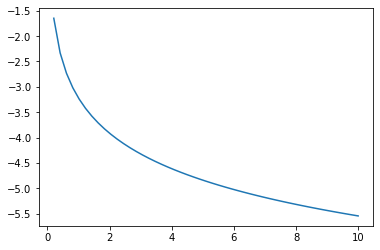

In [48]:
x=np.linspace(0,10)
plt.plot(x,pm.Lognormal.dist(0.25,10).logp(x).eval())

In [14]:
np.round(D,2)

array([0.15, 0.21, 0.22, 0.18, 0.27, 0.29, 0.26, 0.12, 0.25, 0.24])